In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = Path('./Resources/combined_data.csv')
df = pd.read_csv(data)
df.head()

,order_name,family_name,scientific_name,datetime,individuals,location_name,tempmax,tempmin,temp_daily,humidity
0,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,8/21/1994,1,"Universitetsparken 15, 2100 KÃ¸benhavn, Denmark",66.1,49.9,59.6,72.9
1,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,8/25/1994,1,"Universitetsparken 15, 2100 KÃ¸benhavn, Denmark",66.3,59.1,62.3,89.8
2,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,7/25/1996,1,"Universitetsparken 15, 2100 KÃ¸benhavn, Denmark",76.6,57.1,63.8,74.2
3,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,7/19/1998,1,"Universitetsparken 15, 2100 KÃ¸benhavn, Denmark",62.9,49.9,57.6,83.2
4,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,8/10/1999,1,"Universitetsparken 15, 2100 KÃ¸benhavn, Denmark",73.7,57.3,66.3,83.5


In [3]:
y = df["individuals"]
X = df.loc[:,["tempmax"]]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(33066, 1)

In [5]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

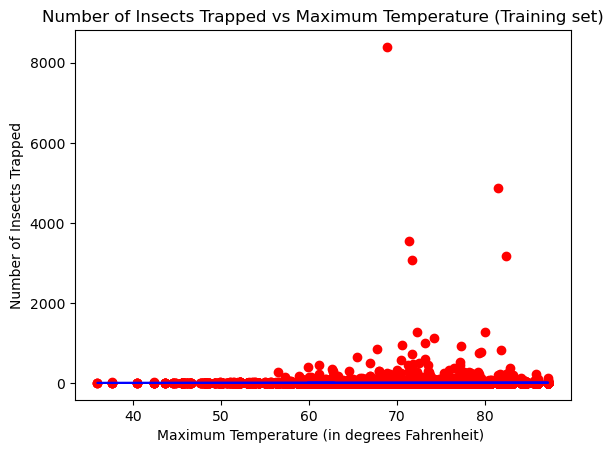

In [6]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Maximum Temperature (Training set)')
plt.xlabel('Maximum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [7]:
y = df["individuals"]
X = df.loc[:,["tempmin"]]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(33066, 1)

In [9]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

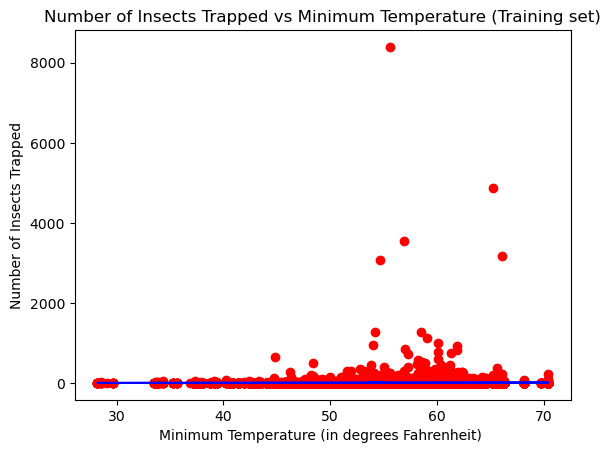

In [10]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Minimum Temperature (Training set)')
plt.xlabel('Minimum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [11]:
y = df["individuals"]
X = df.loc[:,["temp_daily"]]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(33066, 1)

In [13]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

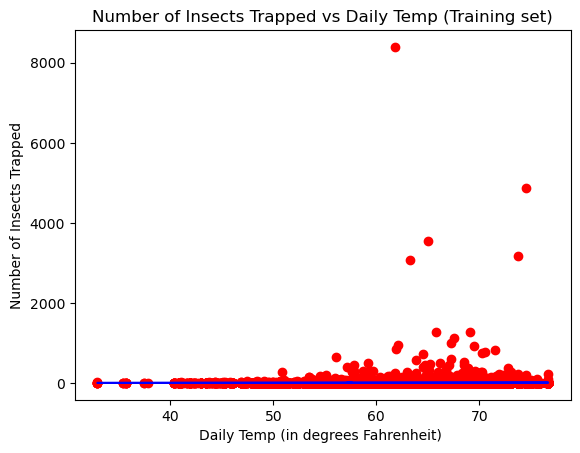

In [14]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Daily Temp (Training set)')
plt.xlabel('Daily Temp (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [15]:
y = df["individuals"]
X = df.loc[:,["humidity"]]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(33066, 1)

In [17]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

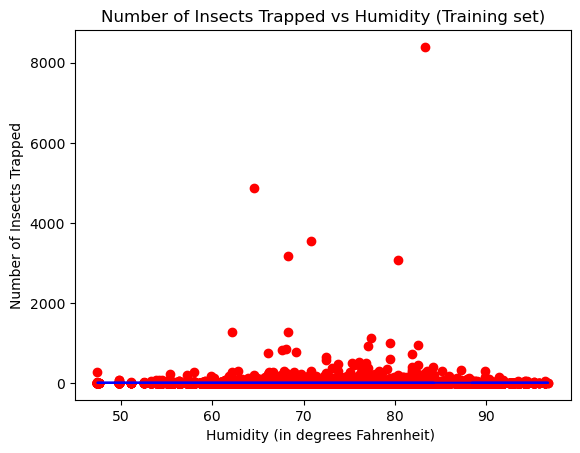

In [18]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Humidity (Training set)')
plt.xlabel('Humidity (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [19]:
# Segment the features from the target
y = df["individuals"]
X = df.drop(columns=["order_name", "family_name", "scientific_name", "datetime", "individuals", "location_name","tempmax","tempmin"])

In [20]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape

(35270, 2)

In [21]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [22]:
# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,5
1,1,9
2,1,1
3,1,1
4,1,1


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5249489680199592

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4629,    0,    0, ...,    0,    0,    0],
       [1359,    0,    0, ...,    0,    0,    0],
       [ 700,    0,    0, ...,    0,    0,    0],
       ...,
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      1.00      0.69      4629
           2       0.00      0.00      0.00      1359
           3       0.00      0.00      0.00       700
           4       0.00      0.00      0.00       421
           5       0.00      0.00      0.00       287
           6       0.00      0.00      0.00       214
           7       0.00      0.00      0.00       176
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00        69
          11       0.00      0.00      0.00        68
          12       0.00      0.00      0.00        54
          13       0.00      0.00      0.00        54
          14       0.00      0.00      0.00        35
          15       0.00      0.00      0.00        42
          16       0.00      0.00      0.00        37
          17       0.00      0.00      0.00        38
          18       0.00    

c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif